# Heart Disease Classification

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split


# Initializations
init_notebook_mode(connected=True)

# Remove any warning messages
warnings.filterwarnings("ignore")

# Reading Data Set

In [ ]:
datafr = pd.read_csv("heart.csv", error_bad_lines=False)

# Structure of Data Set

In [ ]:
display(datafr.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [ ]:
# Dimension of the datatset
print("Dimension of the dataset is: ",datafr.shape)
# Check if any column has missing value
datafr.isnull().sum()

Dimension of the dataset is:  (297, 14)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Observation for Target Variable

In [ ]:
len(datafr.target[datafr.target==0])

160

In [ ]:
len(datafr.target[datafr.target==1])


137

They are roughly the same so we can use ROC curve as it summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

# Replacing Labels


In [ ]:
cleanup_nums = {"cp":     {0: "CPType 0", 1: "CPType 1", 2:"CPType 2", 3: "CPType 3"},
                "thal": {0: "Normal", 1: "Fixed Defect", 2: "Reversable Defect" }}
datafr.replace(cleanup_nums, inplace=True)
datafr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,CPType 0,160,234,1,2,131,0,0.1,1,1,Normal,0
1,69,0,CPType 0,140,239,0,0,151,0,1.8,0,2,Normal,0
2,66,0,CPType 0,150,226,0,0,114,0,2.6,2,0,Normal,0
3,65,1,CPType 0,138,282,1,2,174,0,1.4,1,1,Normal,1
4,64,1,CPType 0,110,211,0,2,144,1,1.8,1,0,Normal,0


# Graphical Represetation

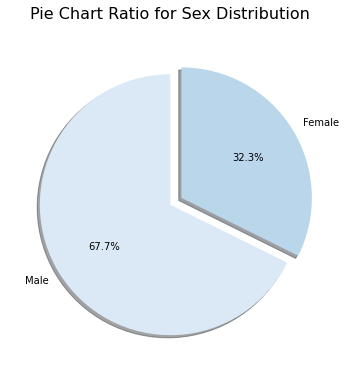

In [ ]:
male =len(datafr[datafr['sex'] == 1])
female = len(datafr[datafr['sex']== 0])

# Data to plot
labels = 'Male','Female'
sizes = [male,female]

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=(0, 0.1), labels=labels, colors=sns.color_palette("Blues"),
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pie Chart Ratio for Sex Distribution\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)

Text(0.5, 1.0, 'BoxPlot for chol')

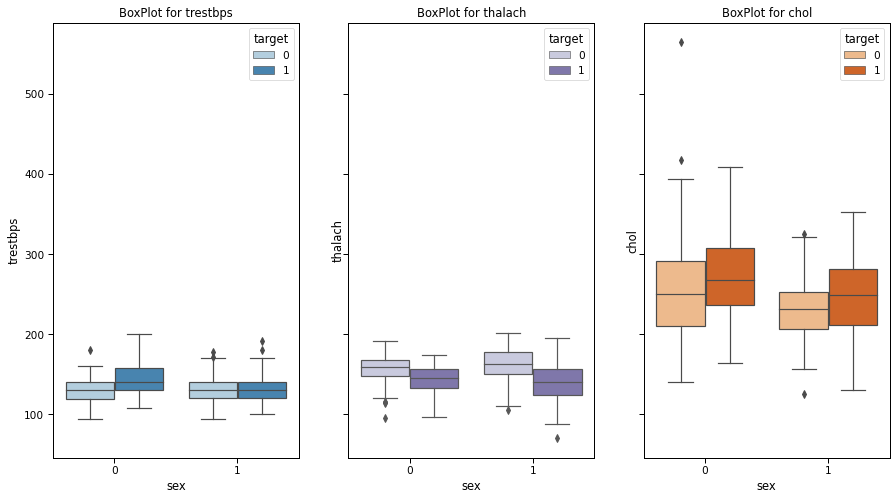

In [ ]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 8))
sns.boxplot(x="sex", y="trestbps", hue="target", data=datafr, palette='Blues', ax=axes[0])
axes[0].set_title('BoxPlot for {}'.format("trestbps"))
sns.boxplot(x="sex", y="thalach", hue="target", data=datafr, palette='Purples', ax=axes[1])
axes[1].set_title('BoxPlot for {}'.format("thalach"))
sns.boxplot(x="sex", y="chol", hue="target", data=datafr, palette='Oranges', ax=axes[2])
axes[2].set_title('BoxPlot for {}'.format("chol"))

Plot displaying male and female with potential heart disease based on age

<Figure size 432x432 with 0 Axes>

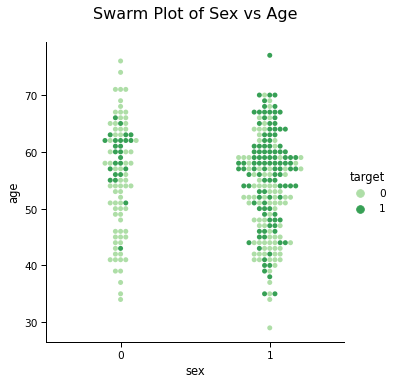

In [ ]:
plt.figure(figsize=(6,6))
sns.catplot(x="sex", y="age", hue="target", kind="swarm", data=datafr, palette='Greens')
plt.title('Swarm Plot of Sex vs Age\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)

Visualizing the ratio of different chest pain types in the dataset

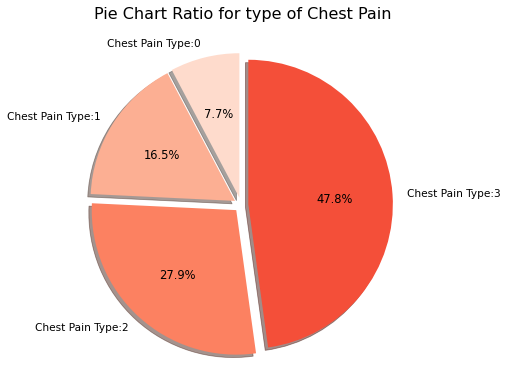

In [ ]:
# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(datafr[datafr['cp'] == "CPType 0"]),len(datafr[datafr['cp'] == "CPType 1"]),
         len(datafr[datafr['cp'] == "CPType 2"]),
         len(datafr[datafr['cp'] == "CPType 3"])]

plt.figure(figsize=(6,6))

# Plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("Reds"),
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pie Chart Ratio for type of Chest Pain\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)

plt.axis('equal')
plt.show()

Plot displaying potential of heart disease based on various levels of chest pain types by age

<Figure size 432x432 with 0 Axes>

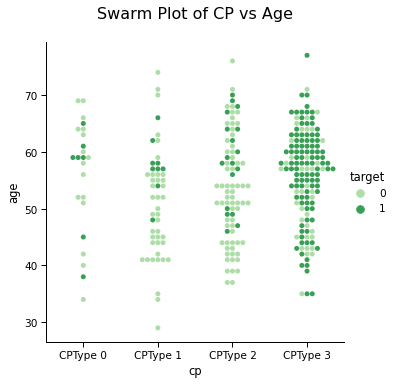

In [ ]:
plt.figure(figsize=(6,6))
sns.catplot(x="cp", y="age", hue="target", kind="swarm", data=datafr, palette='Greens')
plt.title('Swarm Plot of CP vs Age\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)

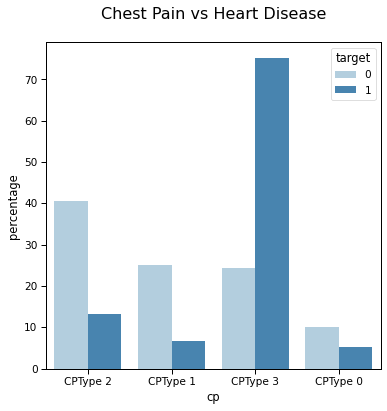

In [ ]:
"""
Normalizing the values and then making it as a DataFrame and then plotting using sns.barplot.
"""
plt.figure(figsize=(6,6))
temp = (datafr.groupby(['target']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "cp", y = "percentage", hue = "target", data = temp, palette='Blues')\
.set_title("Chest Pain vs Heart Disease\n", fontsize=16)
sns.set_context("paper", font_scale=1.2)

Visualizing the ratio of dataset based on (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

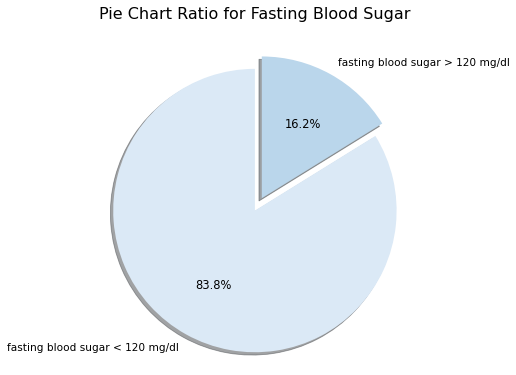

In [ ]:
# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(datafr[datafr['fbs'] == 0]),len(datafr[datafr['cp'] == "CPType 1"])]

plt.figure(figsize=(6,6))
 
# Plot
plt.pie(sizes, explode=(0.05, 0.05), labels=labels, colors=sns.color_palette("Blues"),
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pie Chart Ratio for Fasting Blood Sugar\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)
 
plt.axis('equal')
plt.show()  

Checking the distribution of feature 'thalach: maximum heart rate achieved'

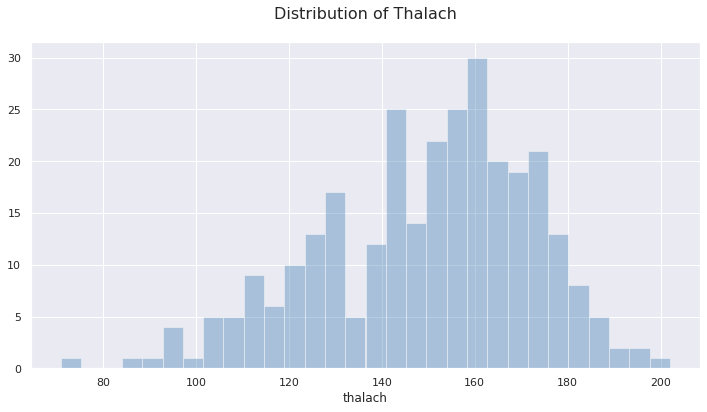

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.distplot(datafr['thalach'],kde=False,bins=30,color='steelblue')
plt.title('Distribution of Thalach\n', fontsize=16)
sns.set_context("paper", font_scale=1.4)

The distribution is normal indicating most population fall between 140-180 with some left tail indicating few outliers which we can validate once we create a scatterplot with residuals, leverage and cook's distance.

Checking the distribution of feature 'chol: serum cholestoral in mg/dl'

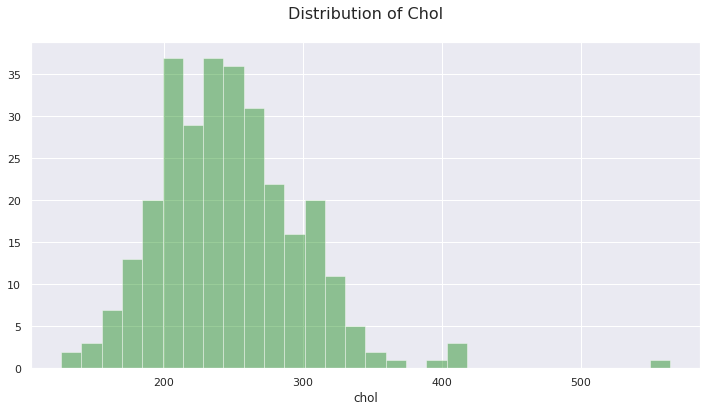

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.distplot(datafr['chol'],kde=False,bins=30,color="green")
plt.title('Distribution of Chol\n', fontsize=16)
sns.set_context("paper", font_scale=1.4)

Visualizing the distribution of people having heart disease based on age

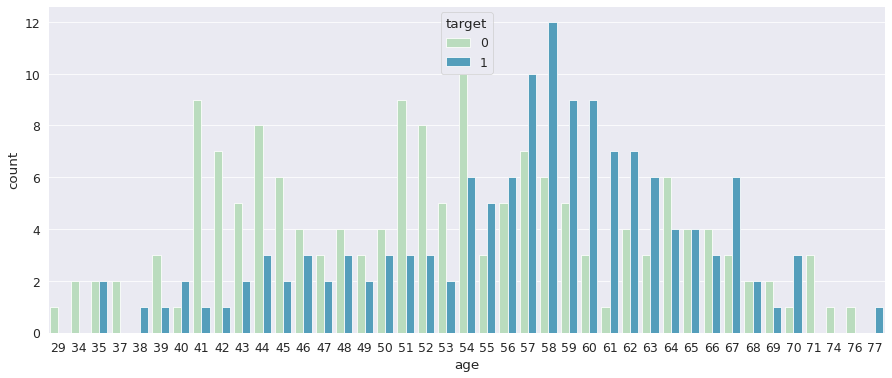

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = datafr, hue = 'target',palette='GnBu')
sns.set_context("paper", font_scale=1.4)
plt.show()

# Data Preparation

In [ ]:
datafr = pd.get_dummies(datafr, columns=["cp", "thal"])
datafr.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_CPType 0,cp_CPType 1,cp_CPType 2,cp_CPType 3,thal_Fixed Defect,thal_Normal,thal_Reversable Defect
0,69,1,160,234,1,2,131,0,0.1,1,1,0,1,0,0,0,0,1,0
1,69,0,140,239,0,0,151,0,1.8,0,2,0,1,0,0,0,0,1,0
2,66,0,150,226,0,0,114,0,2.6,2,0,0,1,0,0,0,0,1,0
3,65,1,138,282,1,2,174,0,1.4,1,1,1,1,0,0,0,0,1,0
4,64,1,110,211,0,2,144,1,1.8,1,0,0,1,0,0,0,0,1,0


Splitting Dataset into Test and Train

In [ ]:
# Predictor variables
X= datafr.drop('target',axis=1)
# Target or Class variable
Y=datafr['target']

In [ ]:
# Let's using scikit learn to split our dataset
# Using 70:30 ratio for train:test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=400)

In [ ]:
X_train.shape

(207, 18)

In [ ]:
X_test.shape

(90, 18)

# Preprocessing and Cleaning

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# Modeling

In [ ]:
# Using 10 folds cross-validation
def CrossVal(trainX,trainY,model):
    accuracy=cross_val_score(model,trainX , trainY, cv=10, scoring='accuracy')
    return(accuracy)

# Applying ML Algorithms

# Simple Vector Machine

In [ ]:
# Start with Support Vector Machine for Binary Classification
clf = svm.SVC(gamma='scale', probability=True)
# Creare a model with X_train and Y_train data
clf.fit(X_train,Y_train)
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [1]:
# Run the model on X_test to predict the target labels. 
predict1 = clf.predict(X_test)
clf=svm.SVC(C=0.2,probability=True,kernel='rbf',gamma='scale')
score_clf=CrossVal(X_train,Y_train,clf)
print("Cross-Validation accuracy is {:.2f}%".format(score_clf.mean()*100))

NameError: ignored

Test Accuracy using SVM Model: 81.11%


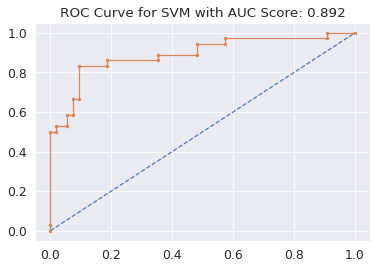

Text(0.5, 1.0, 'F1 Score for SVM model is 0.74')

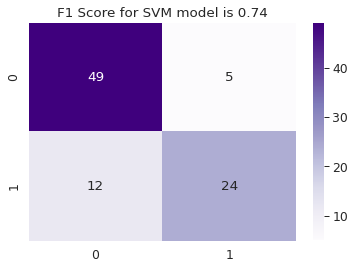

In [ ]:
# Compare the predicted target labels with Y_test
print("Test Accuracy using SVM Model: {:.2f}%".format(accuracy_score(Y_test,predict1)*100))
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,predict1)

# calculate AUC
auc_svm = roc_auc_score(Y_test, probs)
#print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve for SVM with AUC Score: {:.3f}".format(auc_svm))
# show the plot
plt.show()

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
svm_f1=f1_score(Y_test,predict1)
plt.title('F1 Score for SVM model is {:.2f}'.format(svm_f1))

# Random Forest Classifier

In [ ]:

rf = RandomForestClassifier(n_estimators = 13,random_state = 40)
# Creare a model with X_train and Y_train data
rf.fit(X_train,Y_train)
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [ ]:

predict2 = rf.predict(X_test)
rf=RandomForestClassifier(n_estimators=13, n_jobs=-1, random_state=40)
score_rf= CrossVal(X_train,Y_train,rf)
print('Cross-Validation accuracy is {:.2f}%'.format(score_rf.mean()*100))

Cross-Validation accuracy is 82.10%


Accuracy using Random Forest Model: 81.11%


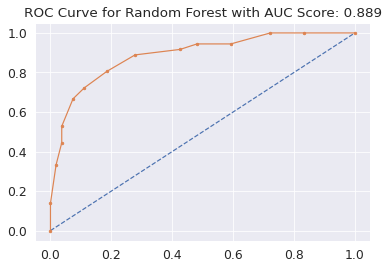

Text(0.5, 1.0, 'F1 Score for Random Forest model is 0.77')

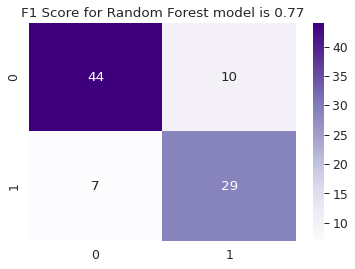

In [ ]:

print("Accuracy using Random Forest Model: {:.2f}%".format(accuracy_score(Y_test,predict2)*100))
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,predict2)

# calculate AUC
auc_rf = roc_auc_score(Y_test, probs)
#print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve for Random Forest with AUC Score: {:.3f}".format(auc_rf))
# show the plot
plt.show()

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
rf_f1=f1_score(Y_test,predict2)
plt.title('F1 Score for Random Forest model is {:.2f}'.format(rf_f1))

# KNN Classifier

In [ ]:

error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

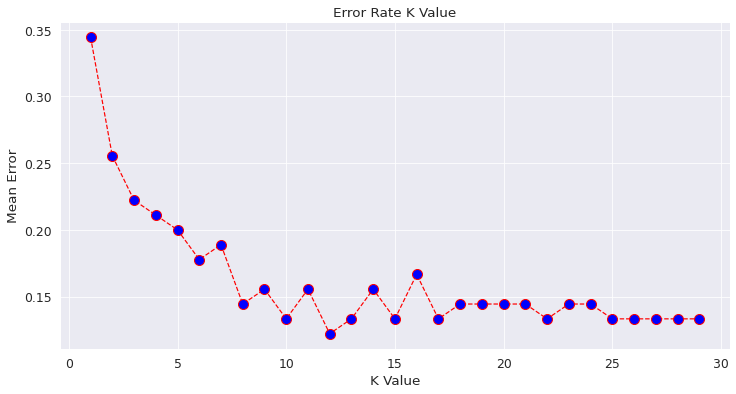

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

From the above figure we can see that we get a minimum error when k is 12.

In [ ]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors= 12)
# Creare a model with X_train and Y_train data
knn.fit(X_train,Y_train)
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [ ]:

predict4 = knn.predict(X_test)
score_knn= CrossVal(X_train,Y_train,knn)
print('Cross-Validation accuracy is {:.2f}%'.format(score_knn.mean()*100))

Cross-Validation accuracy is 83.07%


Accuracy using K Nearest Neighbours Model: 87.78%


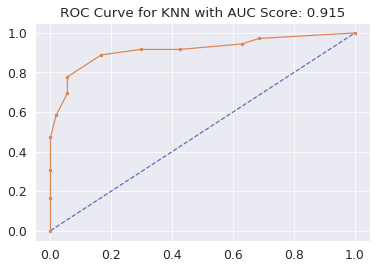

Text(0.5, 1.0, 'F1 Score for K Nearest Neighbour model is 0.84')

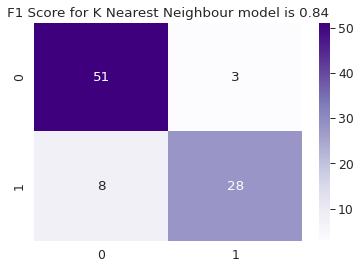

In [ ]:

print("Accuracy using K Nearest Neighbours Model: {:.2f}%".format(accuracy_score(Y_test,predict4)*100))
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,predict4)

# calculate AUC
auc_knn = roc_auc_score(Y_test, probs)
#print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve for KNN with AUC Score: {:.3f}".format(auc_knn))
# show the plot
plt.show()

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
knn_f1=f1_score(Y_test,predict4)
plt.title('F1 Score for K Nearest Neighbour model is {:.2f}'.format(knn_f1))


# AdaBoost Classifier

In [ ]:

# Using Random Forest model 'rf' for boosting
ada=AdaBoostClassifier(rf,n_estimators=100, random_state=40, learning_rate=0.1)
# Creare a model with X_train and Y_train data
ada.fit(X_train,Y_train)
# predict probabilities
probs = ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [ ]:

predict5 = ada.predict(X_test)
score_ada= CrossVal(X_train,Y_train,ada)
print('Cross-Validation accuracy is {:.2f}%'.format(score_ada.mean()*100))

Cross-Validation accuracy is 78.19%


Accuracy using AdaBoost Model: 77.78%


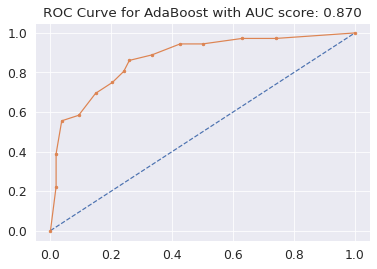

Text(0.5, 1.0, 'F1 Score for AdaBoost model is 0.74')

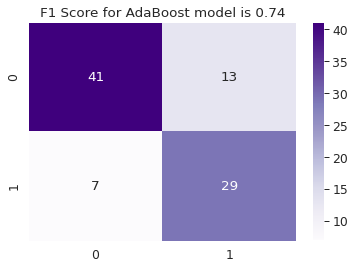

In [ ]:


print("Accuracy using AdaBoost Model: {:.2f}%".format(accuracy_score(Y_test,predict5)*100))
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,predict5)

# calculate AUC
auc_ada = roc_auc_score(Y_test, probs)
#print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve for AdaBoost with AUC score: {:.3f}".format(auc_ada))
# show the plot
plt.show()

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
ada_f1=f1_score(Y_test,predict5)
plt.title('F1 Score for AdaBoost model is {:.2f}'.format(ada_f1))

# Conclusion

Text(0.5, 1.0, 'Performance based on AUC Score')

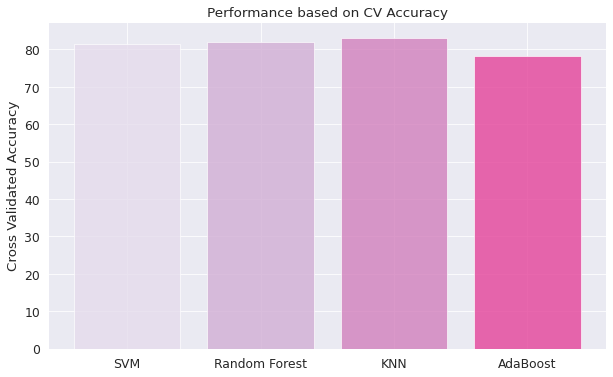

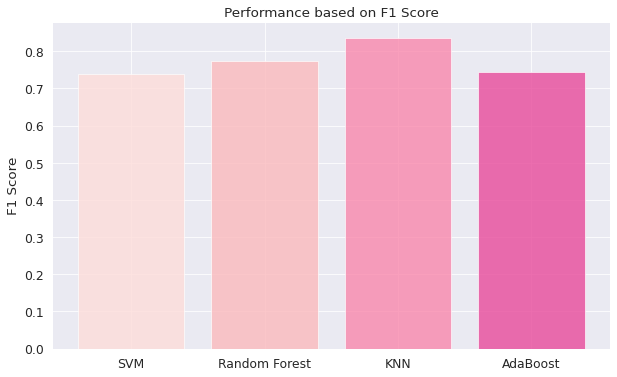

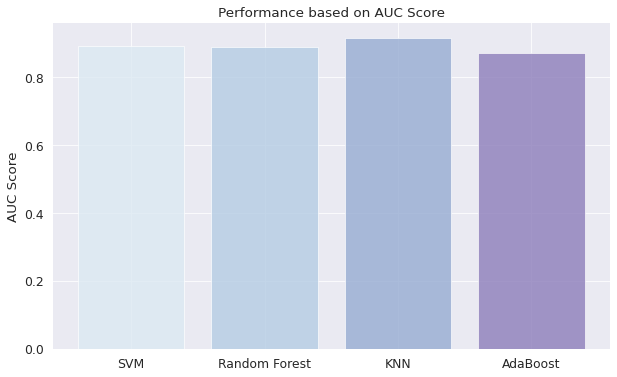

In [ ]:
cv_svm = score_clf.mean()*100
cv_rf = score_rf.mean()*100
cv_knn = score_knn.mean()*100
cv_ada = score_ada.mean()*100
# Cross Validation Accuracy list for all models
cv = [cv_svm, cv_rf, cv_knn, cv_ada]
# F1 Score list for all models
f1 = [svm_f1, rf_f1, knn_f1, ada_f1]
# AUC Score list for all models
auc = [auc_svm, auc_rf, auc_knn, auc_ada]
# Name List of ML Models used
models = ['SVM', 'Random Forest', 'KNN', 'AdaBoost']
y_pos = np.arange(len(models)) #Position = 0,1,2,3,4

# Plot Cross Validation Accuracy
plt.figure(figsize=(10, 6))  
plt.bar(y_pos, cv, align='center', alpha=0.8, color=sns.color_palette("PuRd"))
plt.xticks(y_pos, models)
plt.ylabel('Cross Validated Accuracy')
plt.title('Performance based on CV Accuracy')

# Plot F1 Score
plt.figure(figsize=(10, 6))  
plt.bar(y_pos, f1, align='center', alpha=0.8, color=sns.color_palette("RdPu"))
plt.xticks(y_pos, models)
plt.ylabel('F1 Score')
plt.title('Performance based on F1 Score')

# Plot AUC Score
plt.figure(figsize=(10, 6))  
plt.bar(y_pos, auc, align='center', alpha=0.8, color=sns.color_palette("BuPu"))
plt.xticks(y_pos, models)
plt.ylabel('AUC Score')
plt.title('Performance based on AUC Score')

Based on the above two comparison plots: Cross-Validated Accuracy and F1 Score, K Nearest Neighbours (KNN) seems to have an ideal balance between underfitting and overfitting along with a high F1 Score. KNN also outperforms the competition with the highest test accuracy and highest AUC Score.